#Tarea 4 - Taller de Python para Ciencias de Datos
Por: Cristofer Alarcón, Felipe Espinoza y Francisco Salazar

# 1. Importar las librerías y datos a analizar <a id="0"></a>


In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargar datos en un dataframe

In [ ]:
df = pd.read_csv("datos_vehiculos_procesados.csv", skiprows=0, low_memory=False)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6,20,57022.13488,0.237364,0.199455,Bajo,0,1,0
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0,21,3265.35086,0.249752,0.011422,Bajo,0,1,0
7,Fiesta,2017,9000,Manual,13054,Petrol,113.417932,54.3,1.2,23,21008.32436,0.269078,0.073484,Bajo,0,1,0
8,Kuga,2019,25500,Automatic,6894,Diesel,145.000000,42.2,2.0,17,11094.78996,0.209118,0.038808,Bajo,1,0,0
9,Focus,2018,10000,Manual,48141,Petrol,113.417932,61.4,1.0,26,77475.23694,0.304262,0.270997,Bajo,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        17966 non-null  object 
 1   year                         17966 non-null  int64  
 2   price                        17966 non-null  int64  
 3   transmission                 17966 non-null  object 
 4   mileage                      17966 non-null  int64  
 5   fuelType                     17966 non-null  object 
 6   tax                          17966 non-null  float64
 7   mpg                          17966 non-null  float64
 8   engineSize                   17966 non-null  float64
 9   km/L                         17966 non-null  int64  
 10  km                           17966 non-null  float64
 11  km/LNorm                     17966 non-null  float64
 12  kmNorm                       17966 non-null  float64
 13  gastos-en-km/L  

In [ ]:
df.corr()
#mientras más cerca del 1, más correlacionados

,year,price,mileage,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
year,1.000000,0.636009,-0.707818,0.297275,-0.022967,-0.137311,-0.021447,-0.707818,-0.022967,-0.707818,0.036498,-0.037896,0.014022
price,0.636009,1.000000,-0.530659,0.406037,-0.346419,0.411178,-0.345217,-0.530659,-0.346419,-0.530659,0.208185,-0.258757,0.141278
mileage,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114
tax,0.297275,0.406037,-0.259653,1.000000,-0.501936,0.184260,-0.496534,-0.259653,-0.501936,-0.259653,0.154757,-0.181456,0.089345
mpg,-0.022967,-0.346419,0.120075,-0.501936,1.000000,-0.260521,0.997657,0.120075,1.000000,0.120075,-0.235047,0.302291,-0.174106
engineSize,-0.137311,0.411178,0.215035,0.184260,-0.260521,1.000000,-0.254040,0.215035,-0.260521,0.215035,0.163889,-0.224341,0.140918
km/L,-0.021447,-0.345217,0.121924,-0.496534,0.997657,-0.254040,1.000000,0.121924,0.997657,0.121924,-0.234768,0.302214,-0.174306
km,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114
km/LNorm,-0.022967,-0.346419,0.120075,-0.501936,1.000000,-0.260521,0.997657,0.120075,1.000000,0.120075,-0.235047,0.302291,-0.174106
kmNorm,-0.707818,-0.530659,1.000000,-0.259653,0.120075,0.215035,0.121924,1.000000,0.120075,1.000000,-0.050340,0.059756,-0.030114


In [ ]:
#Mas relacion entre ellos
df[['price', 'year']].corr()

,price,year
price,1.000000,0.636009
year,0.636009,1.000000


Se puede examino la correlación entre las variables `year` y `price` y se puede ver que es aproximadamente 0,636.

(0.0, 83484.34423956333)

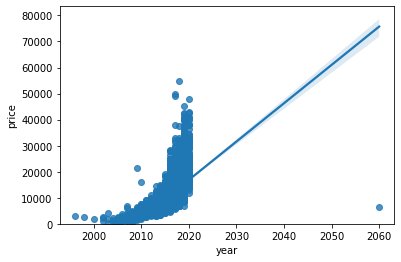

In [ ]:
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)   
#Polinomial

A medida que aumenta el año, aumenta el precio: esto indica una **correlación directa/positiva** entre estas dos variables. El año parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.